# Preprocessing

### Data Cleaner - Transformers

Dataset preprocessing examples

In [1]:
import numpy as np
import pandas as pd

from mlearner.preprocessing import minmax_scaling, MeanCenterer, FeatureDropper
from mlearner.preprocessing import FillNaTransformer_median, FillNaTransformer_mean
from mlearner.preprocessing import FillNaTransformer_idmax, FillNaTransformer_any
from mlearner.preprocessing import FillNaTransformer_all, FillNaTransformer_value 
from mlearner.preprocessing import FillNaTransformer_backward, FillNaTransformer_forward
from mlearner.preprocessing import FixSkewness, OneHotEncoder, DropOutliers, ReplaceTransformer
from mlearner.preprocessing import ReplaceMulticlass, ExtractCategories, DataAnalyst, DataExploratory

Load data in `DataAnalyst` class

> from mlearner.preprocessing import DataAnalyst

In [2]:
filename = "mlearner/data/data/titanic3.csv"
dataset = DataAnalyst.load_data(filename, sep=",")

In [3]:
dataset.data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
dataset.dtypes()

pclass         int64
survived       int64
name          object
sex           object
age           object
sibsp          int64
parch          int64
ticket        object
fare          object
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [5]:
dataset.data["age"] = dataset.data["age"].astype(np.float32)

In [6]:
dataset.Xy_dataset(target=["survived"])

### Apply Transformers

#### Drop Nan

In [7]:
dataset.X.shape

(1309, 13)

In [8]:
dataset.missing_values(dataset.X)

,total
body,1188
cabin,1014
boat,823
home.dest,564
age,263
embarked,2
fare,1
pclass,0
name,0
sex,0


Transformer `FillNaTransformer_median` class

> from mlearner.preprocessing import FillNaTransformer_median

In [9]:
mc = FillNaTransformer_median(columns=["body"]).fit(dataset.X)
dataset.missing_values(mc.transform(dataset.X))


C:\Users\AUTIS\Anaconda3\envs\Tensorflow 2.0\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,total
cabin,1014
boat,823
home.dest,564
age,263
embarked,2
fare,1
pclass,0
name,0
sex,0
sibsp,0


In [10]:
dataset.X.shape

(1309, 13)

Transformer `FillNaTransformer_mean` class

> from mlearner.preprocessing import FillNaTransformer_mean

In [11]:
mc = FillNaTransformer_median(columns=["age"]).fit(dataset.X)
dataset.missing_values(mc.transform(dataset.X))

,total
cabin,1014
boat,823
home.dest,564
embarked,2
fare,1
pclass,0
name,0
sex,0
age,0
sibsp,0


In [12]:
dataset.X.shape

(1309, 13)

Transformer `FillNaTransformer_idmax` class

> from mlearner.preprocessing import FillNaTransformer_idmax

In [13]:
mc = FillNaTransformer_idmax(columns=["embarked"]).fit(dataset.X)
dataset.X = mc.transform(dataset.X)
dataset.missing_values(dataset.X)

C:\Users\AUTIS\Google Drive\10_MachineLearning_JS\MachineLearning\05_MLearner\MLearner\mlearner\preprocessing\replace_na.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[col] = X[col].fillna(X[col].value_counts().idxmax())


,total
cabin,1014
boat,823
home.dest,564
fare,1
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0


In [14]:
dataset.X.shape

(1309, 13)

Transformer `FillNaTransformer_value` class

> from mlearner.preprocessing import FillNaTransformer_value

In [15]:
mc = FillNaTransformer_value(columns=["home.dest"]).fit(dataset.X, value="Empty")
dataset.X = mc.transform(dataset.X)
dataset.missing_values(dataset.X)

,total
cabin,1014
boat,823
fare,1
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0


In [16]:
dataset.X.shape

(1309, 13)

Transformer `FillNaTransformer_backward` class

> from mlearner.preprocessing import FillNaTransformer_backward

In [17]:
dataset.Xy_dataset(target=["survived"])
mc = FillNaTransformer_backward().fit(dataset.X)
dataset.X = mc.transform(dataset.X)
dataset.missing_values(dataset.X)

,total
cabin,59
home.dest,27
boat,9
body,2
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0


In [18]:
dataset.X.shape

(1309, 13)

Transformer `FillNaTransformer_forward` class

> from mlearner.preprocessing import FillNaTransformer_forward

In [19]:
dataset.Xy_dataset(target=["survived"])
mc = FillNaTransformer_forward().fit(dataset.X)
dataset.X = mc.transform(dataset.X)
dataset.missing_values(dataset.X)

,total
body,3
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0


In [20]:
dataset.X.shape

(1309, 13)

Transformer `FillNaTransformer_all` class

> from mlearner.preprocessing import FillNaTransformer_all

In [21]:
mc = FillNaTransformer_median().fit(dataset.X)
dataset.X = mc.transform(dataset.X)
dataset.missing_values(dataset.X)

,total
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0
embarked,0


In [22]:
dataset.X.shape

(1309, 13)

Transformer `FillNaTransformer_any` class

> from mlearner.preprocessing import FillNaTransformer_any

In [23]:
mc = FillNaTransformer_any().fit(dataset.X)
AUX = mc.transform(dataset.X)
dataset.missing_values(AUX)

,total
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0
embarked,0


In [24]:
dataset.X.shape

(1309, 13)

### Extract targets

Transformer `ExtractCategories` class

> **from** mlearner.preprocessing **import** ExtractCategories

Extracting subsets of data from a selected category

In [25]:
mc = ExtractCategories(categories=[1], target=["survived"]).fit(dataset.data)
data_survived = mc.transform(dataset.data)
data_survived.shape

(500, 14)

### Drop Features

Transformer `FeatureDropper` class

> **from** mlearner.preprocessing **import** FeatureDropper

In [26]:
mc = FeatureDropper(drop=["name"]).fit(dataset.data)
data_survived = mc.transform(dataset.data)
dataset.data.shape, data_survived.shape

((1309, 14), (1309, 13))

### Drop Outliers

Transformer `DropOutliers` class

> **from** mlearner.preprocessing **import** DropOutliers

C:\Users\AUTIS\Anaconda3\envs\Tensorflow 2.0\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\AUTIS\Anaconda3\envs\Tensorflow 2.0\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(1309, 116)

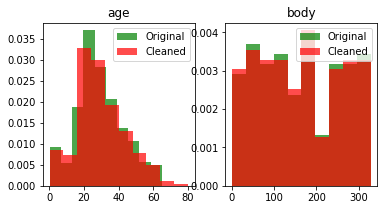

In [27]:
mc = DropOutliers(features=["age", "body"]).fit(dataset.data)
data_survived = mc.transform(dataset.data)
dataset.data.shape[0], data_survived.shape[0]

### Scaling

Transformer `minmax_scaling` class

> from mlearner.preprocessing import minmax_scaling

In [28]:
dataset.X["age"].max(), dataset.X["age"].min()

(80.0, 0.1667)

In [29]:
new = minmax_scaling(dataset.X, columns=["age"])
new.head(5)

,age
0,0.361169
1,0.009395
2,0.022964
3,0.373695
4,0.311064


### Fix Skewnesss

Transformer `FixSkewness` class

> **from** mlearner.preprocessing **import** FixSkewness

(array([ 76.,  85., 336., 319., 208., 148.,  71.,  51.,  11.,   4.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ], dtype=float32),
 <a list of 10 Patch objects>)

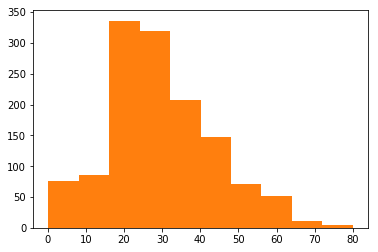

In [30]:
import matplotlib.pyplot as plt
mc = FixSkewness(columns=["age"]).fit(dataset.X)
plt.hist(dataset.data["age"])
plt.hist(mc.transform(dataset.X)["age"])

### One-Hot-Encoder

Transformer `OneHotEncoder` class

> **from** mlearner.preprocessing **import** OneHotEncoder

In [31]:
mc = OneHotEncoder(columns=["pclass"]).fit(dataset.X)
data_X = mc.transform(dataset.X)
data_X[["pclass_1", "pclass_2", "pclass_3"]].head()

,pclass_1,pclass_2,pclass_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


### Replace map

Transformer `ReplaceTransformer` class

> **from** mlearner.preprocessing **import** ReplaceTransformer

In [32]:
mapping = {"C": 0, "S": 1, "Q": 3}
mc = ReplaceTransformer(columns=["embarked"], mapping=mapping).fit(dataset.X)
data_X = mc.transform(dataset.X)
data_X["embarked"].unique()

array([1, 0, 3], dtype=int64)

In [33]:
### Replace Multiclass

Transformer `ReplaceMulticlass` class

> **from** mlearner.preprocessing **import** ReplaceMulticlass

In [34]:
dataset.X.columns.tolist()

['pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [35]:
col = ['pclass', 'sex', 'sibsp', 'parch', 'ticket']
mc = ReplaceMulticlass(columns=col).fit(dataset.X)
data_X = mc.transform(dataset.X)
data_X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,0,211.3375,B5,S,2,171.0,"St Louis, MO"
1,0,"Allison, Master. Hudson Trevor",1,0.9167,1,1,1,151.5500,C22 C26,S,11,171.0,"Montreal, PQ / Chesterville, ON"
2,0,"Allison, Miss. Helen Loraine",0,2.0000,1,1,1,151.5500,C22 C26,S,11,171.0,"Montreal, PQ / Chesterville, ON"
3,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,1,1,151.5500,C22 C26,S,11,135.0,"Montreal, PQ / Chesterville, ON"
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,1,1,151.5500,C22 C26,S,11,135.0,"Montreal, PQ / Chesterville, ON"


# API

In [36]:
with open('../../api_modules/mlearner.preprocessing/DataExploratory.md', 'r') as f:
    print(f.read())

FileNotFoundError: [Errno 2] No such file or directory: '../../api_modules/mlearner.preprocessing/DataExploratory.md'

In [ ]:
with open('../../api_modules/mlearner.preprocessing/DataAnalyst.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/ExtractCategories.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/ReplaceMulticlass.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/ReplaceTransformer.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/DropOutliers.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/OneHotEncoder.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/FixSkewness.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/FillNaTransformer_forward.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/FillNaTransformer_backward.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/FillNaTransformer_value.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/FillNaTransformer_all.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/FillNaTransformer_any.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/FillNaTransformer_idmax.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/FillNaTransformer_mean.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/FillNaTransformer_median.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/MeanCenterer.md', 'r') as f:
    print(f.read())

In [ ]:
with open('../../api_modules/mlearner.preprocessing/minmax_scaling.md', 'r') as f:
    print(f.read())